File indexex in the list:  0
File indexex in the list:  3333
File indexex in the list:  6666


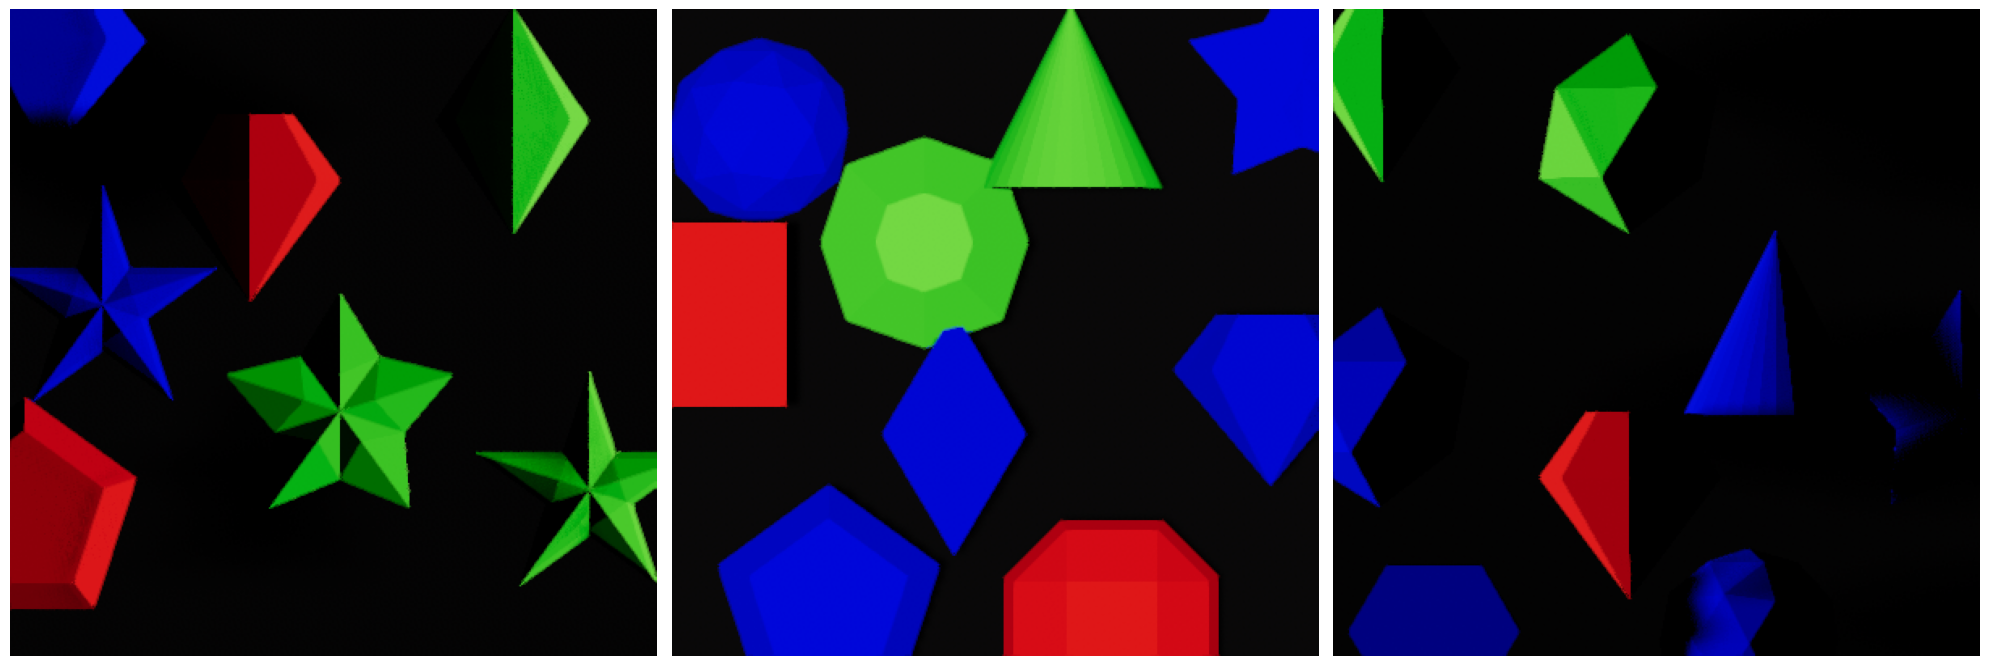

In [2]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import os


light_angle_gems_data_path = r"..\..\UsefullnessOfDepth\datasets\SynthDet_rgb_light\RGB"

rgb_light_image_files = os.listdir(light_angle_gems_data_path)
rgb_light_image_files = sorted(rgb_light_image_files)
rgb_light_image_files = [os.path.join(light_angle_gems_data_path, image_file) for image_file in rgb_light_image_files if image_file.startswith("test")]

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
# for i, image_file in image_files[::100]:
for i, image_file in enumerate(rgb_light_image_files[100:][::4500]):
    print("File indexex in the list: ", i * 3333)
    image = Image.open(image_file)
    ax[i].imshow(image)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

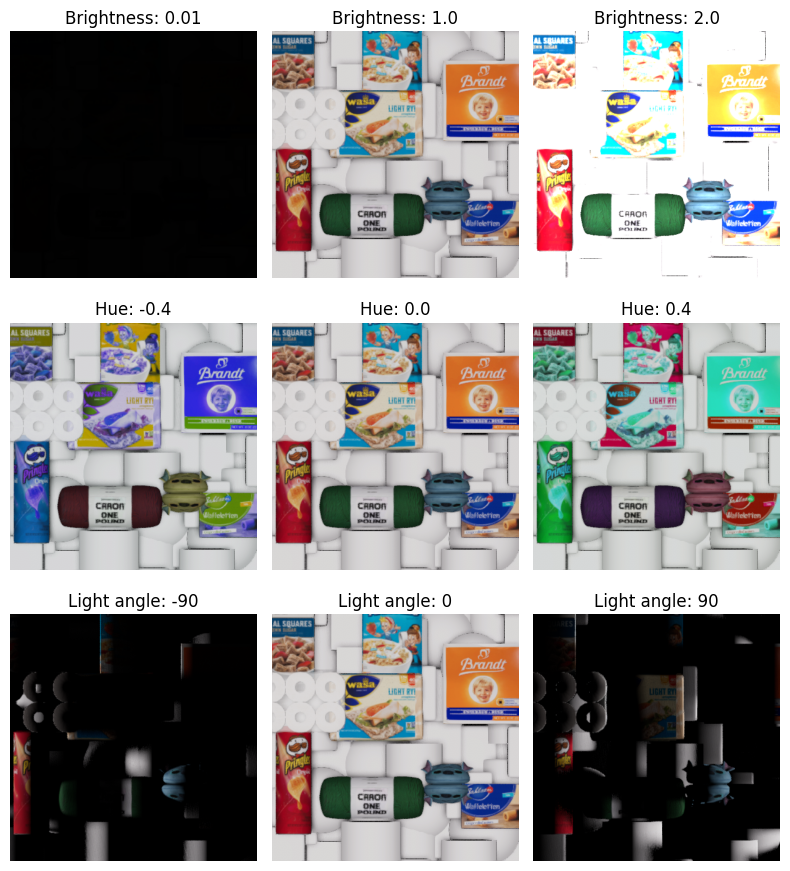

In [30]:
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import os
import torchvision.transforms.functional as F
import re

def extract_number(f):
    s = re.findall("\d+", f)
    return (int(s[0]) if s else -1, f)

# code\UsefullnessOfDepth\jupyter_notebooks\images\groceries.png
groceries_image_path = "images/groceries.png"
groceries90_image_path = "images/groceries90.png"
groceries270_image_path = "images/groceries270.png"

image = Image.open(groceries_image_path)
image90 = Image.open(groceries90_image_path)
image270 = Image.open(groceries270_image_path)

saturation_values = [0.01, 1.0, 2.0]
brightness_values = [0.01, 1.0, 2.0]
hue_values = [-0.4, 0.0, 0.4]
light_angles = [-90, 0, 90]
fig, ax = plt.subplots(3, 3, figsize=(8, 9))  # Adjusted to 3 rows instead of 4
i = 0

# for j, saturation in enumerate(saturation_values):
#     saturation_adjusted_image = F.adjust_saturation(image, saturation)
#     ax[i, j].imshow(saturation_adjusted_image)
#     ax[i, j].axis('off')
#     ax[i, j].set_title(f"Saturation: {saturation}")
for j, brightness in enumerate(brightness_values):
    brightness_adjusted_image = F.adjust_brightness(image, brightness)
    ax[i, j].imshow(brightness_adjusted_image)  # Use ax[i, j] since it's now the first row
    ax[i, j].axis('off')
    ax[i, j].set_title(f"Brightness: {brightness}")
for j, hue in enumerate(hue_values):
    hue_adjusted_image = F.adjust_hue(image, hue)
    ax[i + 1, j].imshow(hue_adjusted_image)  # Adjusted to i + 1
    ax[i + 1, j].axis('off')
    ax[i + 1, j].set_title(f"Hue: {hue}")

ax[i + 2, 0].imshow(image90)  # Adjusted to i + 2
ax[i + 2, 0].axis('off')
ax[i + 2, 0].set_title("Light angle: -90")

ax[i + 2, 1].imshow(image)  # Adjusted to i + 2
ax[i + 2, 1].axis('off')
ax[i + 2, 1].set_title("Light angle: 0")

ax[i + 2, 2].imshow(image270)  # Adjusted to i + 2
ax[i + 2, 2].axis('off')
ax[i + 2, 2].set_title("Light angle: 90")

plt.tight_layout()
plt.show()

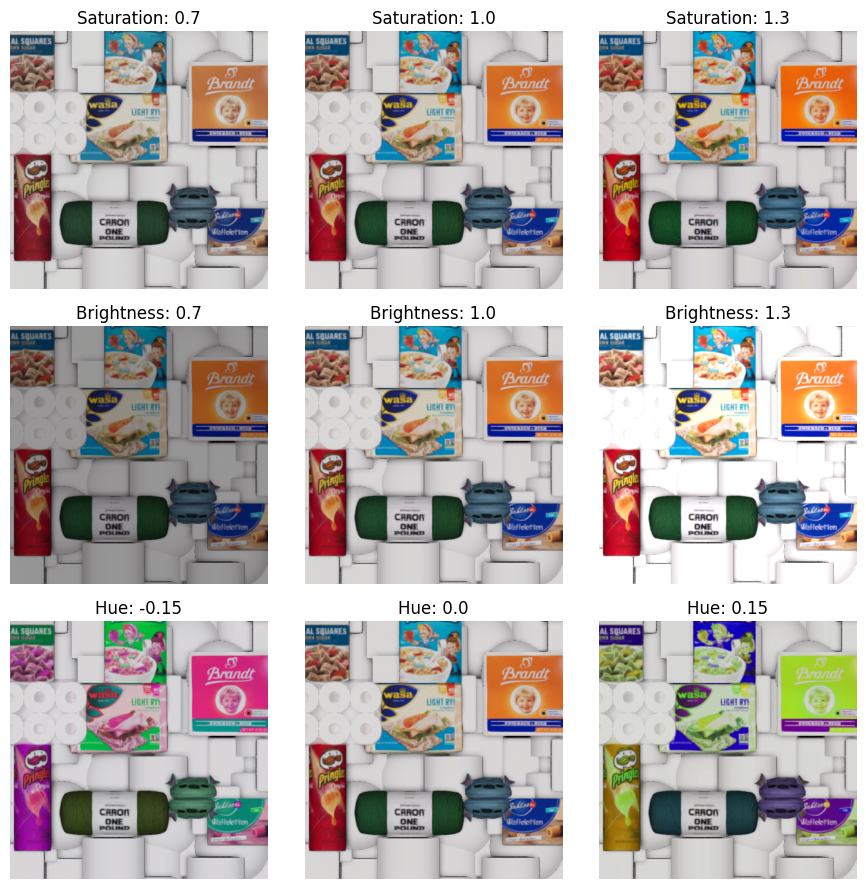

In [22]:
saturation_values = [0.7, 1.0, 1.3]
brightness_values = [0.7, 1.0, 1.3]
hue_values = [-0.15, 0.0, 0.15]
# light_angles = [-90, 0, 90]
fig, ax = plt.subplots(3, 3, figsize=(9, 9))
i = 0
for j, saturation in enumerate(saturation_values):
    saturation_adjusted_image = F.adjust_saturation(image, saturation)
    ax[i, j].imshow(saturation_adjusted_image)
    ax[i, j].axis('off')
    ax[i, j].set_title(f"Saturation: {saturation}")
for j, brightness in enumerate(brightness_values):
    brightness_adjusted_image = F.adjust_brightness(image, brightness)
    ax[i + 1, j].imshow(brightness_adjusted_image)
    ax[i + 1, j].axis('off')
    ax[i + 1, j].set_title(f"Brightness: {brightness}")
for j, hue in enumerate(hue_values):
    hue_adjusted_image = F.adjust_hue(image, hue)
    ax[i + 2, j].imshow(hue_adjusted_image)
    ax[i + 2, j].axis('off')
    ax[i + 2, j].set_title(f"Hue: {hue}")

plt.tight_layout()
plt.show()

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

def parse_experiment_data_DFormer(data):
    parsed_data = {}
    lines = data.strip().split("\n")
    
    current_experiment = ""
    current_property = ""
    current_property_value = 0.0

    for line in lines:
        line = line.strip()
        if line.startswith("Experiment:"):
            current_experiment = line.split(":")[1].strip()
            parsed_data[current_experiment] = {}
        elif line.startswith("Property:"):
            parts = line.split("Property value:")
            current_property_value = float(parts[1].strip())
            if current_property_value not in parsed_data[current_experiment]:
                parsed_data[current_experiment][current_property_value] = {}

        if parsed_data == {} or parsed_data[current_experiment] == {}: continue
        
        if "RGB-D mIoU" in line and "RGB-D variation" in line:
            temp_line = line.split(":")[1]
            parsed_data[current_experiment][current_property_value]["RGB-D"] = float(re.search(r"\d+\.\d+", temp_line).group())
            temp_line = line.split(":")[2]
            parsed_data[current_experiment][current_property_value]["RGBD_VARIATION"] = float(re.search(r"\d+\.\d+", temp_line).group())
        elif "RGBD mIoU" in line:
            temp_line = line.split(":")[1]
            parsed_data[current_experiment][current_property_value]["RGB-D"] = float(re.search(r"\d+\.\d+", temp_line).group())
        elif "RGBD_VARIATION mIoU" in line:
            temp_line = line.split(":")[1]
            parsed_data[current_experiment][current_property_value]["RGBD_VARIATION"] = float(re.search(r"\d+\.\d+", temp_line).group())
        elif "DEPTH" in line:
            parsed_data[current_experiment][current_property_value]["DEPTH"] = float(line.split(":")[1].strip())
        elif "RGB mIoU" in line:
            parsed_data[current_experiment][current_property_value]["RGB"] = float(line.split(":")[1].strip())
        elif "RGB_VARIATION mIoU" in line:
            parsed_data[current_experiment][current_property_value]["RGB_VARIATION"] = float(line.split(":")[1].strip())
    
    return parsed_data

def aggregate_experiment_data(file_paths): 
    aggregated_data = {}
    for file_path in file_paths:
        with open(file_path, "r") as file:
            input_data = file.read()
            experiment_dict = parse_experiment_data_DFormer(input_data)
            for experiment_name, models in experiment_dict.items():
                if experiment_name not in aggregated_data:
                    aggregated_data[experiment_name] = {}
                for model_name, properties in models.items():
                    if model_name not in aggregated_data[experiment_name]:
                        aggregated_data[experiment_name][model_name] = {}
                    for property_name, value in properties.items():
                        if property_name not in aggregated_data[experiment_name][model_name]:
                            aggregated_data[experiment_name][model_name][property_name] = []
                        aggregated_data[experiment_name][model_name][property_name].append(value)
    
    return aggregated_data

# Experiment: saturation

def parse_experiment_data_TokenFusion(data):
    parsed_data = {}
    lines = data.strip().split("\n")
    
    current_experiment = ""
    current_property = ""
    current_property_value = 0.0

    for line in lines:
        line = line.strip()
        if line.startswith("Experiment:"):
            current_experiment = line.split(":")[1].strip()
            parsed_data[current_experiment] = {}
        elif line.startswith("Property:"):
            parts = line.split("Property value:")
            current_property_value = float(parts[1].strip())
            if current_property_value not in parsed_data[current_experiment]:
                parsed_data[current_experiment][current_property_value] = {}

        if parsed_data == {} or parsed_data[current_experiment] == {}: continue
        
        if "RGBD mIoU" in line:
            miou_values = re.findall(r"\d+\.\d+", line)
            if len(miou_values) == 3:
                parsed_data[current_experiment][current_property_value]["RGB-D"] = float(miou_values[0])
                parsed_data[current_experiment][current_property_value]["RGB"] = float(miou_values[1])
                parsed_data[current_experiment][current_property_value]["DEPTH"] = float(miou_values[2])
            else:
                parsed_data[current_experiment][current_property_value]["RGB-D"] = float(miou_values[0])
        elif "RGBD_VARIATION mIoU" in line:
            miou_values = re.findall(r"\d+\.\d+", line)
            if len(miou_values) == 3:
                parsed_data[current_experiment][current_property_value]["RGBD_VARIATION"] = float(miou_values[0])
                parsed_data[current_experiment][current_property_value]["RGB_VARIATION"] = float(miou_values[1])
                parsed_data[current_experiment][current_property_value]["DEPTH_VARIATION"] = float(miou_values[2])
            else:
                parsed_data[current_experiment][current_property_value]["RGBD_VARIATION"] = float(miou_values[0])

    return parsed_data


def aggregate_experiment_data_TokenFusion(file_paths):
    aggregated_data = {}
    for file_path in file_paths:
        with open(file_path, "r") as file:
            input_data = file.read()
            experiment_dict = parse_experiment_data_TokenFusion(input_data)
            for experiment_name, models in experiment_dict.items():
                if experiment_name not in aggregated_data:
                    aggregated_data[experiment_name] = {}
                for model_name, properties in models.items():
                    if model_name not in aggregated_data[experiment_name]:
                        aggregated_data[experiment_name][model_name] = {}
                    for property_name, value in properties.items():
                        if property_name not in aggregated_data[experiment_name][model_name]:
                            aggregated_data[experiment_name][model_name][property_name] = []
                        aggregated_data[experiment_name][model_name][property_name].append(value)
    
    return aggregated_data


In [2]:
import pprint

# code\UsefullnessOfDepth\checkpoints_robustness_groceries
input_files = glob("../checkpoints_robustness_groceries/log_*.txt")
final_files = []
for file in input_files:
    if "copy" in file or "wrong" in file:
        continue
    final_files.append(file)

aggregated_data_DF = aggregate_experiment_data(final_files)

CMX_input_files = glob("../checkpoints_robustness_groceries_CMX/log_*.txt")
final_files = []
for file in CMX_input_files:
    if "copy" in file or "wrong" in file:
        continue
    final_files.append(file)

# print(final_files)

aggregated_data_CMX = aggregate_experiment_data(final_files)

SF_input_files = glob("../checkpoints_robustness_groceries_SF/log_*.txt")
final_files = []
for file in SF_input_files:
    if "copy" in file or "wrong" in file:
        continue
    final_files.append(file)

aggregated_data_SF = aggregate_experiment_data(final_files)

DL_input_files = glob("../checkpoints_robustness_groceries_DL/log_*.txt")
final_files = []
for file in DL_input_files:
    if "copy" in file or "wrong" in file:
        continue
    final_files.append(file)

aggregated_data_DL = aggregate_experiment_data(final_files)

token_fusion_files = glob("../checkpoints_robustness_groceries_TF/log_*.txt")
final_files = []
for file in token_fusion_files:
    if "copy" in file or "wrong" in file:
        continue
    final_files.append(file)

aggregated_data_TF = aggregate_experiment_data_TokenFusion(final_files)

aggregate_d_data = {}
for experiment_name, data in aggregated_data_DF.items():
    aggregate_d_data[experiment_name] = {}
    for property_value, metrics in data.items():
        aggregate_d_data[experiment_name][property_value] = {
            "RGB-D_DFormer": metrics["RGB-D"],
            "RGB-D_TokenFusion": aggregated_data_TF[experiment_name][property_value]["RGB-D"],
            "RGB-D_CMX": aggregated_data_CMX[experiment_name][property_value]["RGB-D"],
            "RGB": aggregated_data_SF[experiment_name][property_value]["RGB"],
            "DEPTH": metrics["DEPTH"],
            "RGBD_VARIATION_DFormer": metrics["RGBD_VARIATION"],
            "RGBD_VARIATION_TokenFusion": aggregated_data_TF[experiment_name][property_value]["RGBD_VARIATION"],
            "RGBD_VARIATION_CMX": aggregated_data_CMX[experiment_name][property_value]["RGBD_VARIATION"],
            "RGB_VARIATION": aggregated_data_SF[experiment_name][property_value]["RGB_VARIATION"]
            
        }

import pprint 
pprint.pprint(aggregate_d_data)


{'Light angle': {-110.0: {'DEPTH': [75.516, 70.733, 68.429],
                          'RGB': [3.596, 3.21, 3.823, 3.353],
                          'RGB-D_CMX': [5.609, 2.471, 3.816],
                          'RGB-D_DFormer': [6.546, 7.935, 27.534, 5.528],
                          'RGB-D_TokenFusion': [10.652, 9.566, 18.09],
                          'RGBD_VARIATION_CMX': [6.619, 3.849, 6.066],
                          'RGBD_VARIATION_DFormer': [13.963,
                                                     11.89,
                                                     39.364,
                                                     10.23],
                          'RGBD_VARIATION_TokenFusion': [18.254,
                                                         40.178,
                                                         37.836],
                          'RGB_VARIATION': [5.321, 3.691, 3.987, 3.5]},
                 -88.0: {'DEPTH': [75.668, 69.758, 67.77],
                         'RGB

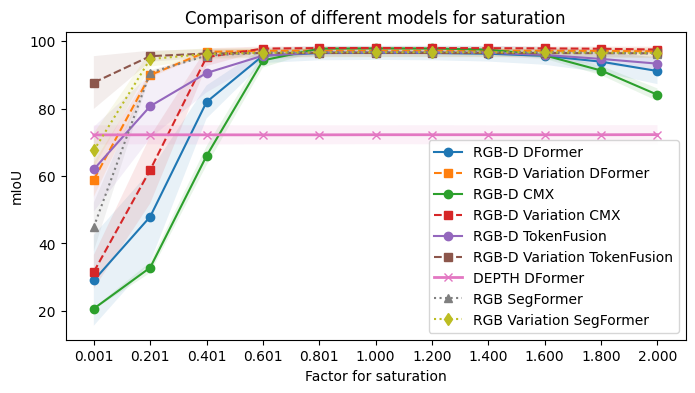

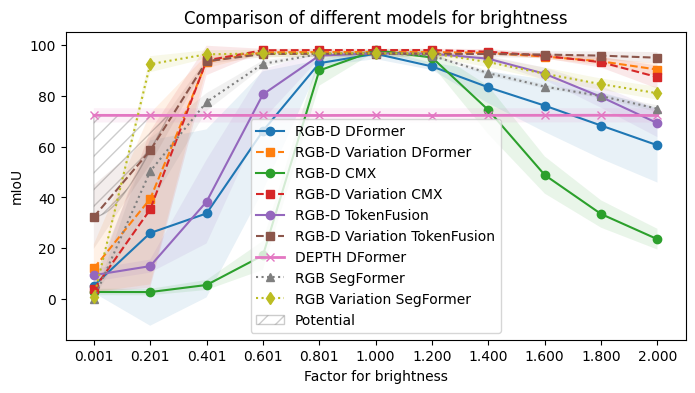

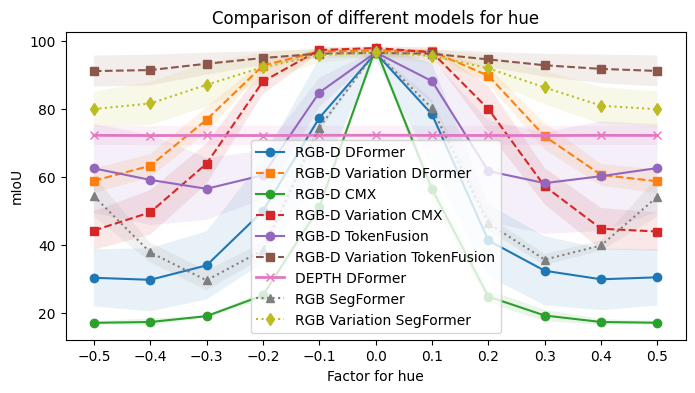

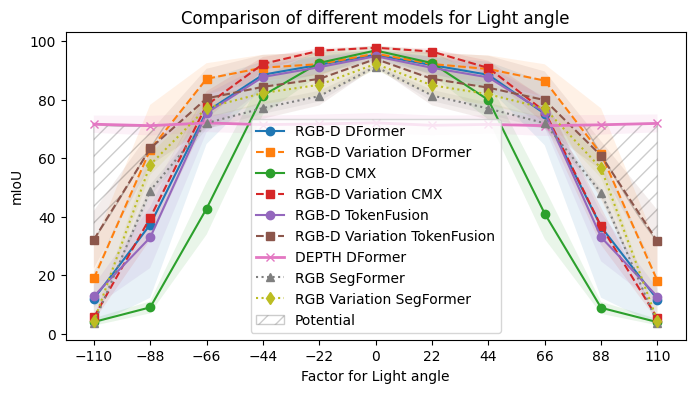

In [3]:
property_values = {
        "saturation": np.linspace(0.001, 2.0, 11),
        "brightness": np.linspace(0.001, 2.0, 11),
        "hue": np.linspace(-0.5, 0.5, 11),
        "Light angle": np.linspace(-110, 110, 11),
}

x_label_degrees = {
    "saturation": (0.001, 2.0),
    "brightness": (0.001, 2.0),
    "hue": (-0.5, 0.5),
    "Light angle": (-110, 110),
}


def plot_aggregated_data(data, figsize=(10, 10)):
    for experiment_name, properties in data.items():
        RGB_D_DFormer = []
        RGB_D_CMX = []
        RGB_D_TokenFusion = []
        RGB = []
        DEPTH = []
        RGBD_VARIATION_DFormer = []
        RGBD_VARIATION_CMX = []
        RGBD_VARIATION_TokenFusion = []
        RGB_VARIATION = []
        # Create a plot for each property
        # On the x-axis we have the different property values
        # On the y-axis we have the mean mIoU
        for property_name, values in properties.items():
            RGB_D_DFormer.append(values["RGB-D_DFormer"])
            RGB_D_CMX.append(values["RGB-D_CMX"])
            RGB_D_TokenFusion.append(values["RGB-D_TokenFusion"])
            RGB.append(values["RGB"])
            DEPTH.append(values["DEPTH"])
            RGBD_VARIATION_DFormer.append(values["RGBD_VARIATION_DFormer"])
            RGBD_VARIATION_CMX.append(values["RGBD_VARIATION_CMX"])
            RGBD_VARIATION_TokenFusion.append(values["RGBD_VARIATION_TokenFusion"])
            RGB_VARIATION.append(values["RGB_VARIATION"])


        plt.figure(figsize=figsize)
        plt.title(f"Comparison of different models for {experiment_name}")

        plt.plot(property_values[experiment_name], np.mean(RGB_D_DFormer, axis=1), label='RGB-D DFormer', marker='o')
        plt.fill_between(
            property_values[experiment_name], 
            np.mean(RGB_D_DFormer, axis=1) - np.std(RGB_D_DFormer, axis=1), 
            np.mean(RGB_D_DFormer, axis=1) + np.std(RGB_D_DFormer, axis=1), 
            alpha=0.1
        )

        plt.plot(property_values[experiment_name], np.mean(RGBD_VARIATION_DFormer, axis=1), label='RGB-D Variation DFormer', marker='s', linestyle='dashed')
        plt.fill_between(
            property_values[experiment_name], 
            np.mean(RGBD_VARIATION_DFormer, axis=1) - np.std(RGBD_VARIATION_DFormer, axis=1), 
            np.mean(RGBD_VARIATION_DFormer, axis=1) + np.std(RGBD_VARIATION_DFormer, axis=1), 
            alpha=0.1
        )

        plt.plot(property_values[experiment_name], np.mean(RGB_D_CMX, axis=1), label='RGB-D CMX', marker='o')
        plt.fill_between(
            property_values[experiment_name], 
            np.mean(RGB_D_CMX, axis=1) - np.std(RGB_D_CMX, axis=1), 
            np.mean(RGB_D_CMX, axis=1) + np.std(RGB_D_CMX, axis=1), 
            alpha=0.1
        )

        plt.plot(property_values[experiment_name], np.mean(RGBD_VARIATION_CMX, axis=1), label='RGB-D Variation CMX', marker='s', linestyle='dashed')
        plt.fill_between(
            property_values[experiment_name], 
            np.mean(RGBD_VARIATION_CMX, axis=1) - np.std(RGBD_VARIATION_CMX, axis=1), 
            np.mean(RGBD_VARIATION_CMX, axis=1) + np.std(RGBD_VARIATION_CMX, axis=1), 
            alpha=0.1
        )

        plt.plot(property_values[experiment_name], np.mean(RGB_D_TokenFusion, axis=1), label='RGB-D TokenFusion', marker='o')
        plt.fill_between(
            property_values[experiment_name], 
            np.mean(RGB_D_TokenFusion, axis=1) - np.std(RGB_D_TokenFusion, axis=1), 
            np.mean(RGB_D_TokenFusion, axis=1) + np.std(RGB_D_TokenFusion, axis=1), 
            alpha=0.1
        )

        plt.plot(property_values[experiment_name], np.mean(RGBD_VARIATION_TokenFusion, axis=1), label='RGB-D Variation TokenFusion', marker='s', linestyle='dashed')
        plt.fill_between(
            property_values[experiment_name], 
            np.mean(RGBD_VARIATION_TokenFusion, axis=1) - np.std(RGBD_VARIATION_TokenFusion, axis=1), 
            np.mean(RGBD_VARIATION_TokenFusion, axis=1) + np.std(RGBD_VARIATION_TokenFusion, axis=1),
            alpha=0.1
        )


        plt.plot(property_values[experiment_name], np.mean(DEPTH, axis=1), label='DEPTH DFormer', marker='x', linewidth=2.0)
        plt.fill_between(
            property_values[experiment_name], 
            np.mean(DEPTH, axis=1) - np.std(DEPTH, axis=1), 
            np.mean(DEPTH, axis=1) + np.std(DEPTH, axis=1), 
            alpha=0.1
        )
      
        plt.plot(property_values[experiment_name], np.mean(RGB, axis=1), label='RGB SegFormer', marker='^', linestyle='dotted')
        plt.fill_between(
            property_values[experiment_name], 
            np.mean(RGB, axis=1) - np.std(RGB, axis=1), 
            np.mean(RGB, axis=1) + np.std(RGB, axis=1), 
            alpha=0.1
        )

        plt.plot(property_values[experiment_name], np.mean(RGB_VARIATION, axis=1), label='RGB Variation SegFormer', marker='d', linestyle='dotted')
        plt.fill_between(
            property_values[experiment_name], 
            np.mean(RGB_VARIATION, axis=1) - np.std(RGB_VARIATION, axis=1), 
            np.mean(RGB_VARIATION, axis=1) + np.std(RGB_VARIATION, axis=1), 
            alpha=0.1
        )

        # Fill between RGBD_VARIATION and DEPTH where DEPTH > RGBD_VARIATION with hatch
        # Create a continuous line for the mean mIoU
        # Fill between the mean mIoU and the standard deviation

        max_rgbd_variation = []
        for i, property_value in enumerate(property_values[experiment_name]):
            DFormer_avg = np.mean(RGBD_VARIATION_DFormer, axis=1)[i]
            CMX_avg = np.mean(RGBD_VARIATION_CMX, axis=1)[i]
            TF_avg = np.mean(RGBD_VARIATION_TokenFusion, axis=1)[i]
            max_rgbd_variation.append(max(DFormer_avg, CMX_avg, TF_avg))
        mean_depth = np.mean(DEPTH, axis=1)
        p_values = property_values[experiment_name]
        x_high_res = np.linspace(p_values.min(), p_values.max(), 10000)
        import scipy.interpolate as interp
        interp_rgbd = interp.interp1d(property_values[experiment_name], max_rgbd_variation, kind='cubic')
        interp_depth = interp.interp1d(property_values[experiment_name], mean_depth, kind='cubic')
        rgbd_values = interp_rgbd(x_high_res)
        depth_values = interp_depth(x_high_res)
            
        above = depth_values > rgbd_values
        start_idx = None
        plotted_before = False

        for i in range(len(x_high_res)):
            if above[i] and start_idx is None:
                start_idx = i
            elif not above[i] and start_idx is not None:
                if plotted_before:
                    plt.fill_between(x_high_res[start_idx:i], rgbd_values[start_idx:i], depth_values[start_idx:i], facecolor="none", alpha=0.2, hatch='//')
                else:
                    plt.fill_between(x_high_res[start_idx:i], rgbd_values[start_idx:i], depth_values[start_idx:i], facecolor="none", alpha=0.2, hatch='//', label='Potential')
                start_idx = None
                plotted_before = True

        # If the last segment goes to the end
        if start_idx is not None:
            if plotted_before:
                plt.fill_between(x_high_res[start_idx:i], rgbd_values[start_idx:i], depth_values[start_idx:i], facecolor="none", alpha=0.2, hatch='//')
            else:
                plt.fill_between(x_high_res[start_idx:], rgbd_values[start_idx:], depth_values[start_idx:], facecolor="none", alpha=0.2, hatch='//', label='Potential')
                

        plt.xlabel(f"Factor for {experiment_name}")
        plt.ylabel('mIoU')
        plt.xticks(property_values[experiment_name])
        # plt.xlim(x_label_degrees[experiment_name])
        plt.legend()
        plt.show()


plot_aggregated_data(aggregate_d_data, figsize=(8, 4))

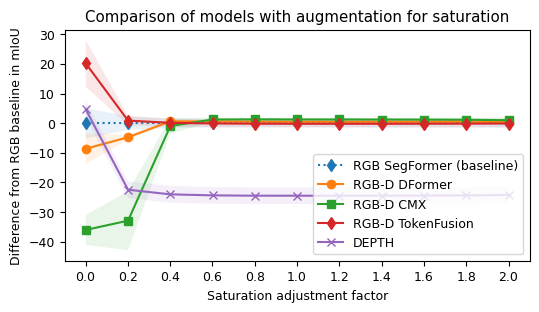

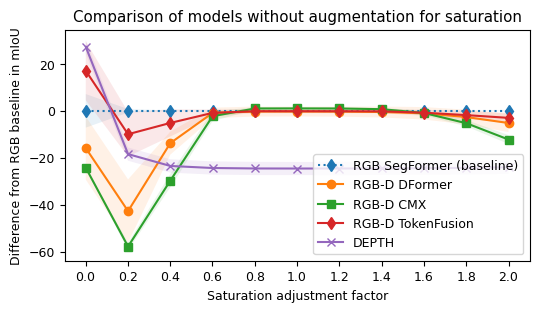

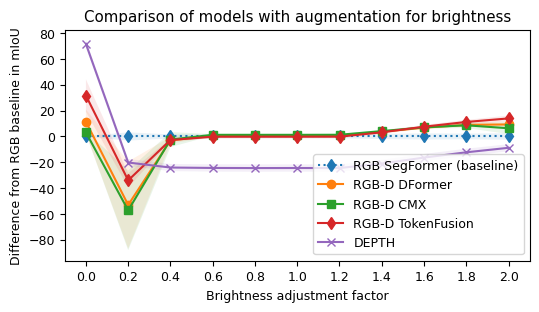

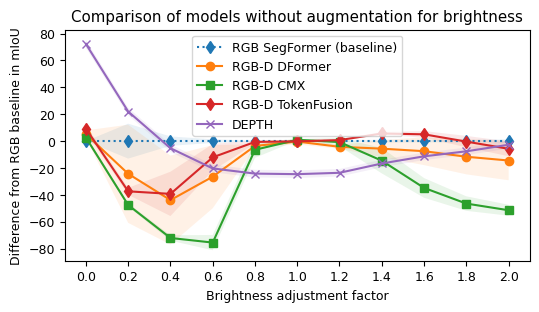

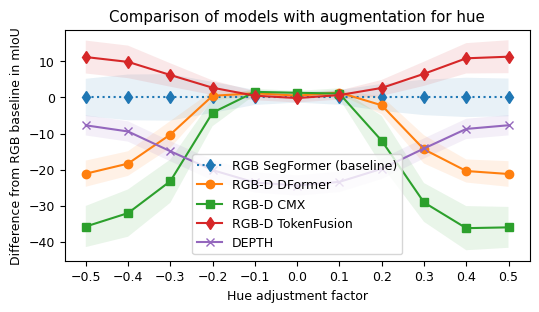

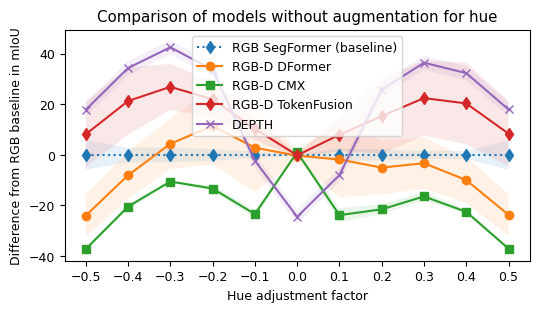

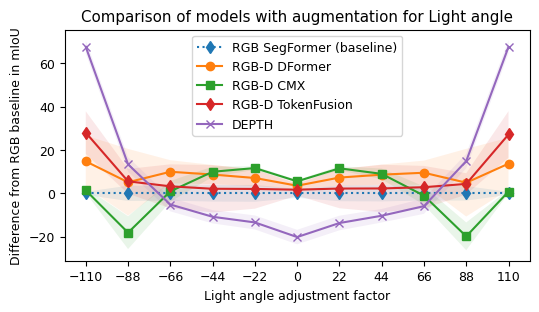

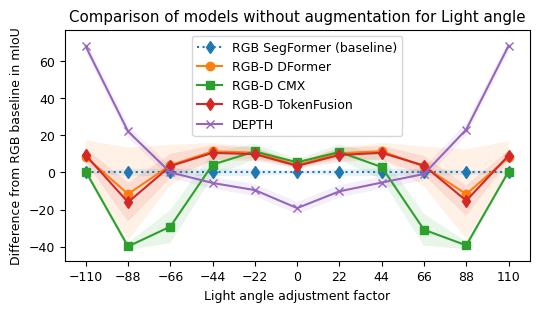

In [4]:
import matplotlib.patches as patches

def plot_aggregated_data3(data, figsize=(10, 10)):
    for experiment_name, properties in data.items():
        models_with_variation = ["RGBD_VARIATION_DFormer", "RGBD_VARIATION_CMX", "RGBD_VARIATION_TokenFusion", "DEPTH"]
        models_without_variation = ["RGB-D_DFormer", "RGB-D_CMX", "RGB-D_TokenFusion", "DEPTH"]
        model_names = ["RGB-D DFormer", "RGB-D CMX", "RGB-D TokenFusion", "DEPTH"]
        markers = ['o', 's', 'd', 'x']

        # Extracting data
        model_data = {model: [] for model in models_with_variation + models_without_variation + ["RGB_VARIATION", "RGB"]}
        for property_name, values in properties.items():
            for model in model_data:
                model_data[model].append(values[model])

        # First plot: Models with VARIATION and DEPTH
        plt.figure(figsize=figsize)
        plt.title(f"Comparison of models with augmentation for {experiment_name}")

        # Baseline plot for RGB_VARIATION
        baseline = np.zeros(len(property_values[experiment_name]))
        plt.plot(property_values[experiment_name], baseline, label='RGB SegFormer (baseline)', marker='d', linestyle='dotted')
        plt.fill_between(property_values[experiment_name], baseline - np.std(model_data["RGB_VARIATION"], axis=1), baseline + np.std(model_data["RGB_VARIATION"], axis=1), alpha=0.1)

        for i, model in enumerate(models_with_variation):
            mean_diff = np.mean(model_data[model], axis=1) - np.mean(model_data["RGB_VARIATION"], axis=1)
            std_diff = np.std(model_data[model], axis=1)
            plt.plot(property_values[experiment_name], mean_diff, label=model_names[i], marker=markers[i])
            plt.fill_between(property_values[experiment_name], mean_diff - std_diff, mean_diff + std_diff, alpha=0.1)

        plt.xlabel(f"{experiment_name.capitalize()} adjustment factor")
        plt.ylabel('Difference from RGB baseline in mIoU')
        plt.xticks([np.round(val, 2) for val in property_values[experiment_name]])
        plt.legend()
        plt.show()

        # Second plot: Models without VARIATION but include DEPTH
        plt.figure(figsize=figsize)
        plt.title(f"Comparison of models without augmentation for {experiment_name}")

        # Baseline plot for RGB
        plt.plot(property_values[experiment_name], baseline, label='RGB SegFormer (baseline)', marker='d', linestyle='dotted')
        plt.fill_between(property_values[experiment_name], baseline - np.std(model_data["RGB"], axis=1), baseline + np.std(model_data["RGB"], axis=1), alpha=0.1)

        for i, model in enumerate(models_without_variation):
            mean_diff = np.mean(model_data[model], axis=1) - np.mean(model_data["RGB"], axis=1)
            std_diff = np.std(model_data[model], axis=1)
            plt.plot(property_values[experiment_name], mean_diff, label=model_names[i], marker=markers[i])
            plt.fill_between(property_values[experiment_name], mean_diff - std_diff, mean_diff + std_diff, alpha=0.1)

        plt.xlabel(f"{experiment_name.capitalize()} adjustment factor")
        plt.ylabel('Difference from RGB baseline in mIoU')
        plt.xticks([np.round(val, 2) for val in property_values[experiment_name]])
        plt.legend()
        plt.show()


plt.rcParams.update({'font.size': 9})
plot_aggregated_data3(aggregate_d_data, figsize=(6, 3))

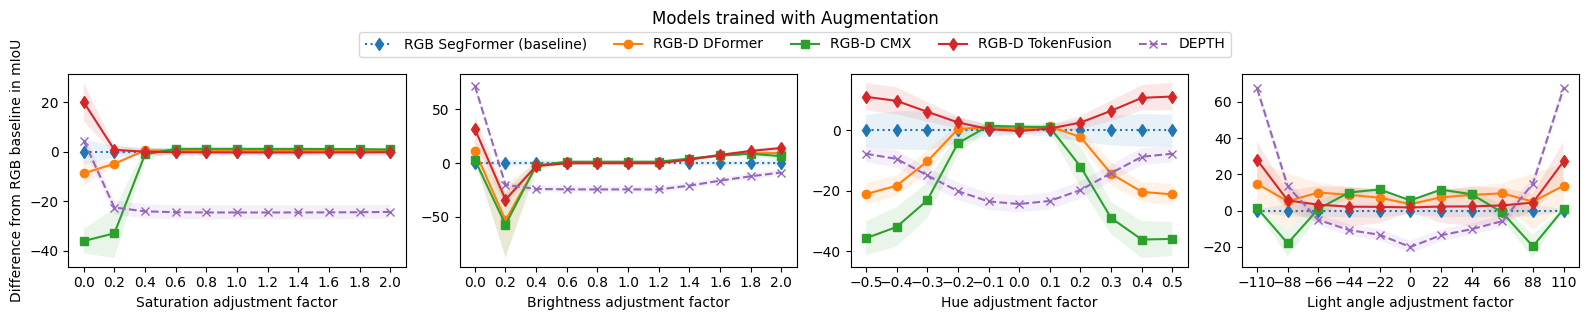

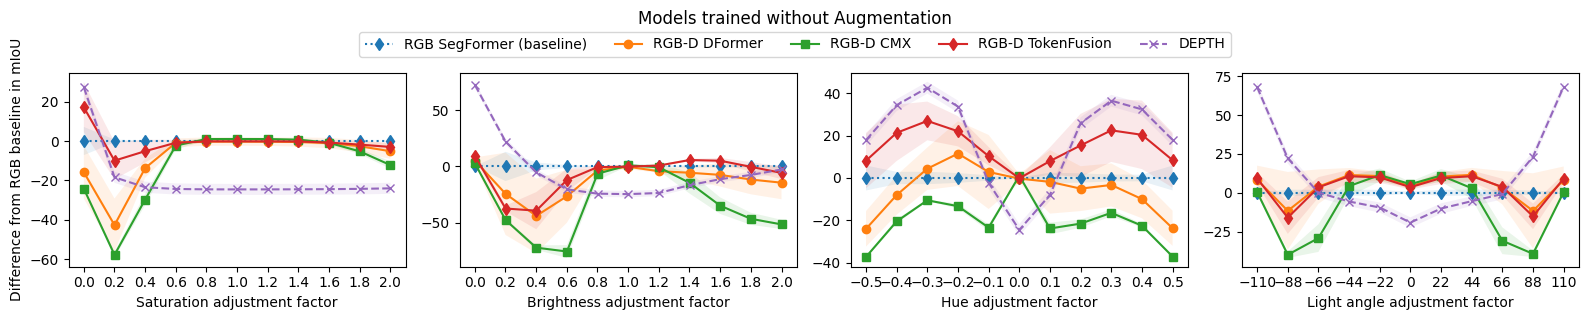

In [5]:
def plot_aggregated_data4(data, figsize=None):
    experiment_indx = 0
    fig1, axs1 = plt.subplots(1, 4, figsize=figsize)
    fig2, axs2 = plt.subplots(1, 4, figsize=figsize)
    for experiment_name, properties in data.items():
        models_with_variation = ["RGBD_VARIATION_DFormer", "RGBD_VARIATION_CMX", "RGBD_VARIATION_TokenFusion", "DEPTH"]
        models_without_variation = ["RGB-D_DFormer", "RGB-D_CMX", "RGB-D_TokenFusion", "DEPTH"]
        model_names = ["RGB-D DFormer", "RGB-D CMX", "RGB-D TokenFusion", "DEPTH"]
        markers = ['o', 's', 'd', 'x']

        # Extracting data
        model_data = {model: [] for model in models_with_variation + models_without_variation + ["RGB_VARIATION", "RGB"]}
        for property_name, values in properties.items():
            for model in model_data:
                model_data[model].append(values[model])

        # First plot: Models with VARIATION and DEPTH

        # Baseline plot for RGB_VARIATION
        baseline = np.zeros(len(property_values[experiment_name]))
        axs1[experiment_indx].plot(property_values[experiment_name], baseline, label='RGB SegFormer (baseline)', marker='d', linestyle='dotted')
        axs1[experiment_indx].fill_between(property_values[experiment_name], baseline - np.std(model_data["RGB_VARIATION"], axis=1), baseline + np.std(model_data["RGB_VARIATION"], axis=1), alpha=0.1)

        for i, model in enumerate(models_with_variation):
            mean_diff = np.mean(model_data[model], axis=1) - np.mean(model_data["RGB_VARIATION"], axis=1)
            std_diff = np.std(model_data[model], axis=1)
            if model == "DEPTH":
                axs1[experiment_indx].plot(property_values[experiment_name], mean_diff, label=model_names[i], marker=markers[i], linestyle='dashed')
            else:
                axs1[experiment_indx].plot(property_values[experiment_name], mean_diff, label=model_names[i], marker=markers[i])
            axs1[experiment_indx].fill_between(property_values[experiment_name], mean_diff - std_diff, mean_diff + std_diff, alpha=0.1)

        axs1[experiment_indx].set_xlabel(f"{experiment_name.capitalize()} adjustment factor")
        if experiment_indx == 0:
            axs1[experiment_indx].set_ylabel('Difference from RGB baseline in mIoU')
        axs1[experiment_indx].set_xticks([np.round(val, 2) for val in property_values[experiment_name]])
        # axs[0, experiment_indx].legend()

        # Second plot: Models without VARIATION but include DEPTH
        axs2[experiment_indx].plot(property_values[experiment_name], baseline, label='RGB SegFormer (baseline)', marker='d', linestyle='dotted')
        axs2[experiment_indx].fill_between(property_values[experiment_name], baseline - np.std(model_data["RGB"], axis=1), baseline + np.std(model_data["RGB"], axis=1), alpha=0.1)



        for i, model in enumerate(models_without_variation):
            mean_diff = np.mean(model_data[model], axis=1) - np.mean(model_data["RGB"], axis=1)
            std_diff = np.std(model_data[model], axis=1)
            if model == "DEPTH":
                axs2[experiment_indx].plot(property_values[experiment_name], mean_diff, label=model_names[i], marker=markers[i], linestyle='dashed')
            else:
                axs2[experiment_indx].plot(property_values[experiment_name], mean_diff, label=model_names[i], marker=markers[i])
            axs2[experiment_indx].fill_between(property_values[experiment_name], mean_diff - std_diff, mean_diff + std_diff, alpha=0.1)

        axs2[experiment_indx].set_xlabel(f"{experiment_name.capitalize()} adjustment factor")
        if experiment_indx == 0:
            axs2[experiment_indx].set_ylabel('Difference from RGB baseline in mIoU')
        axs2[experiment_indx].set_xticks([np.round(val, 2) for val in property_values[experiment_name]])
        # axs[1, experiment_indx].legend()

        experiment_indx += 1

    # Add legends
    handles1, labels1 = axs1[0].get_legend_handles_labels()
    handles2, labels2 = axs2[0].get_legend_handles_labels()
    
    # Add titles
    fig1.suptitle('Models trained with Augmentation', y=1.05)
    fig2.suptitle('Models trained without Augmentation', y=1.05)
    
    # Adjust layout to avoid overlap
    fig1.tight_layout(rect=[0, 0, 1, 1])
    fig2.tight_layout(rect=[0, 0, 1, 1])
    
    fig1.legend(handles1, labels1, loc='upper center', ncol=8, bbox_to_anchor=(0.5, 1.))
    fig2.legend(handles2, labels2, loc='upper center', ncol=8, bbox_to_anchor=(0.5, 1.))
    
    plt.show()


plt.rcParams.update({'font.size': 10})
plot_aggregated_data4(aggregate_d_data, figsize=(16, 3))